# Exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import wrangle as w
import explore as e

In [2]:
df = w.wrangle_zillow()

In [3]:
df.head()

,bedcount,bathcount,sqfeet,value,yearbuilt,taxamount,fips
4,4.0,2.0,3633,296425.0,2005,6941.39,6037
6,3.0,4.0,1620,847770.0,2011,10244.94,6037
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
11,0.0,0.0,1200,5328.0,1972,91.60,6037
14,0.0,0.0,171,6920.0,1973,255.17,6037


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedcount   float64
 1   bathcount  float64
 2   sqfeet     int64  
 3   value      float64
 4   yearbuilt  int64  
 5   taxamount  float64
 6   fips       object 
dtypes: float64(4), int64(2), object(1)
memory usage: 130.6+ MB


In [5]:
#split the data

train, validate, test = w.split_zillow(df)

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [6]:
def plot_variable_pairs(df):
    
    df = df.sample(n = 10000)
    
    cols = ['bedcount', 'bathcount', 'sqfeet', 'yearbuilt', 'taxamount']
    
    target = 'value'
    
    for col in cols:
        
        sns.lmplot(df, x = col, y = target)
        

        

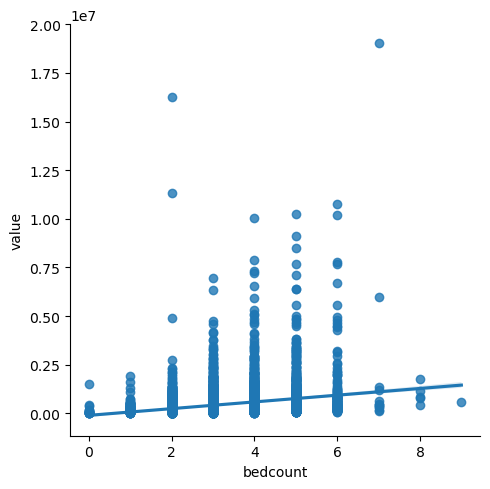

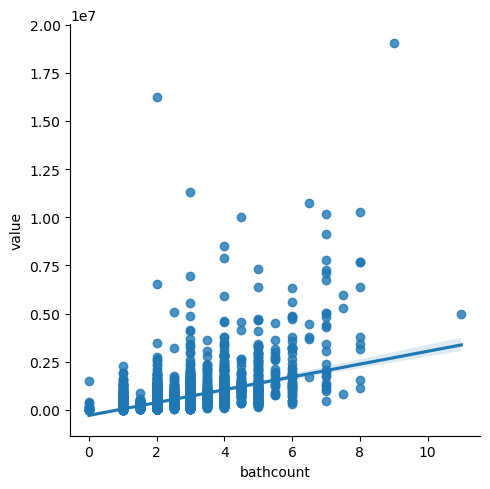

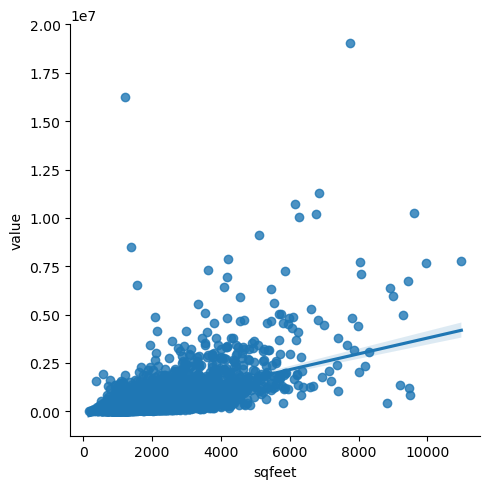

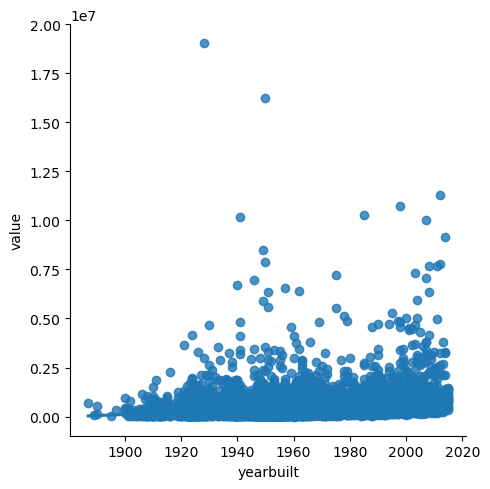

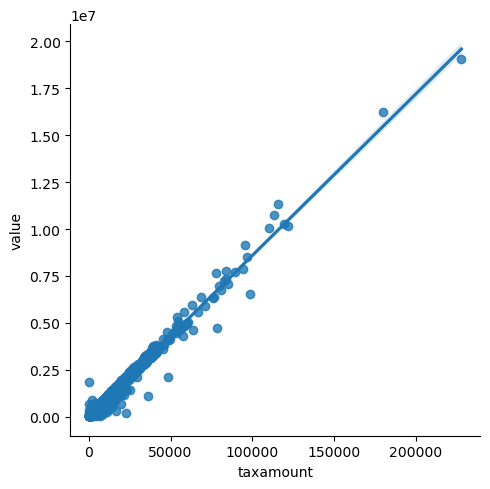

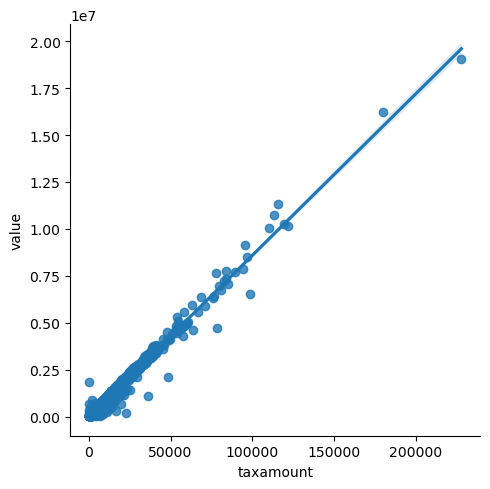

In [7]:
e.plot_variable_pairs(train)

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [8]:
def plot_categorical_and_continuous_vars(df, cat_var_col, con_var_col):
    
    df = df.sample(n=1000)
    
    fig, axs = plt.subplots(1,3, figsize=(18,8))
    
    sns.stripplot(ax=axs[0], x=cat_var_col, y=con_var_col, data=df)
    axs[0].set_title('stripplot')
    
    sns.boxplot(ax=axs[1], x=cat_var_col, y=con_var_col, data=df)
    axs[1].set_title('boxplot')
    
    sns.swarmplot(ax=axs[2], x=cat_var_col, y=con_var_col, data=df, s=1)
    axs[2].set_title('swarmplot')
    

    

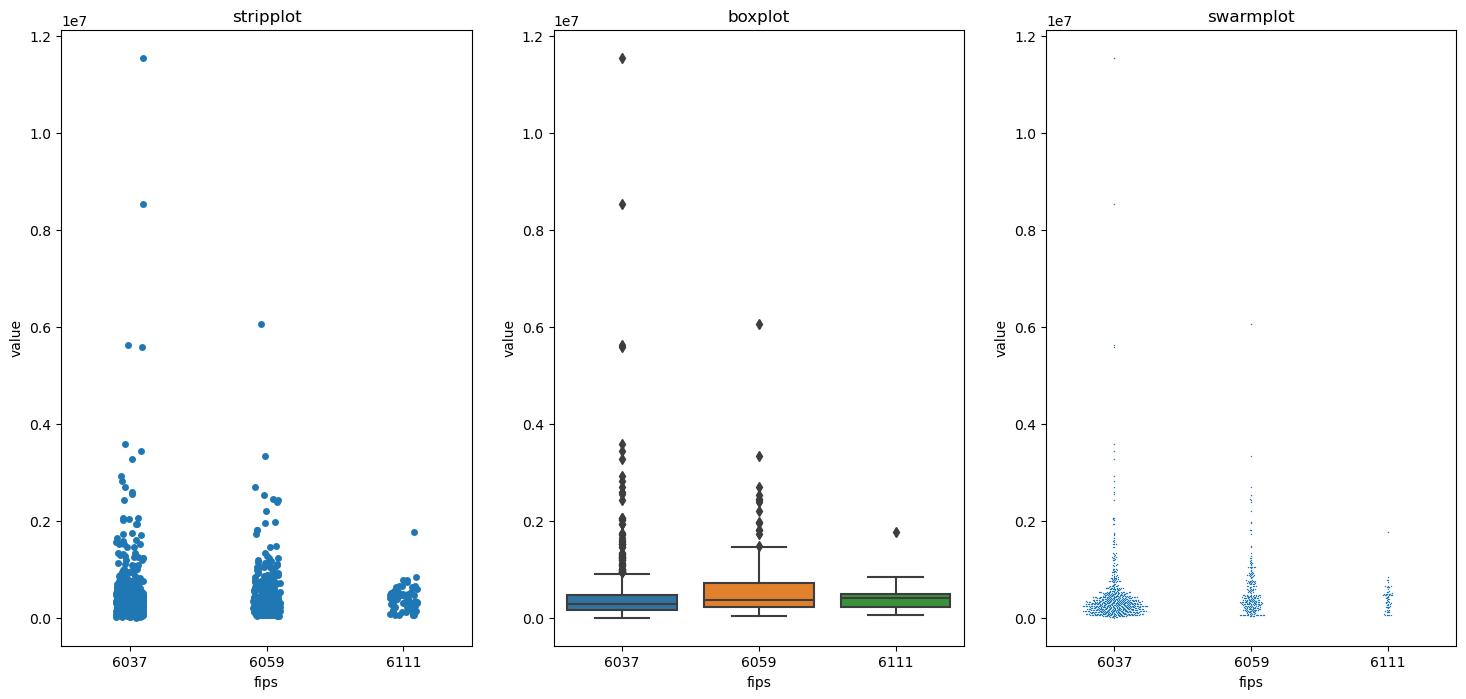

In [9]:
e.plot_categorical_and_continuous_vars(train, 'fips', 'value')

There are a lot of outliers in the data that will need to be dealt with.

## 7. Come up with some initial hypotheses based on your goal of predicting property value.

## Hypothesis

* tax amount will be the biggest indicator for home value since it is directly related to the price of the house
* initially, data will be grouped by county for this reason, since each county will have different tax levels.

$H_0$: There is no correlation between home value and tax amount.

$H_A$: There is a correlation between home value and tax amount.

## Hypothesis

* based on the initial visualizations it seems that bathroom count is related to house value

$H_0$: There is no correlation between home value and bathroom count.

$H_A$: There is a correlation between home value and bathroom count.

## 8. Visualize all combinations of variables in some way.

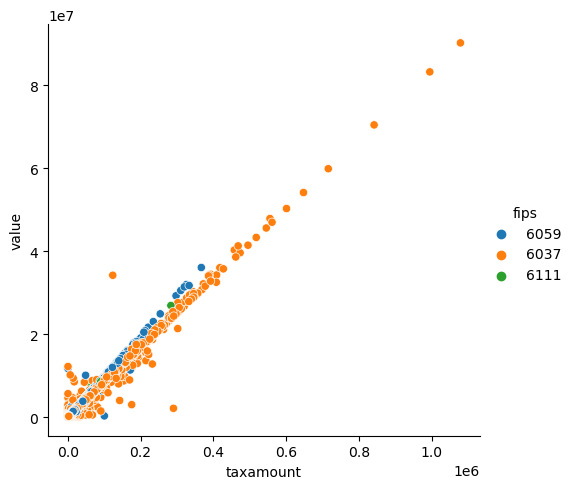

In [10]:
sns.relplot(train, x='taxamount', y='value', hue='fips', kind='scatter')

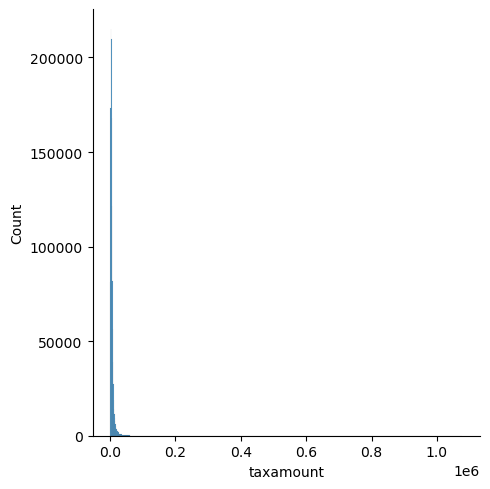

In [11]:
sns.displot(train, x='taxamount', bins = 1000)

## 9. Run the appropriate statistical tests where needed.

Based on the scatterplot there is a strong relationship between tax value and home value for all three counties.
There is not a normal distribution so we will test correlation with the Spearman R correlation test. The p is low so we reject the null hypothesis.

In [12]:
r, p = spearmanr(train.taxamount, train.value)

print('r:', r)
print('p:', p)

r: 0.9786539923389102
p: 0.0
